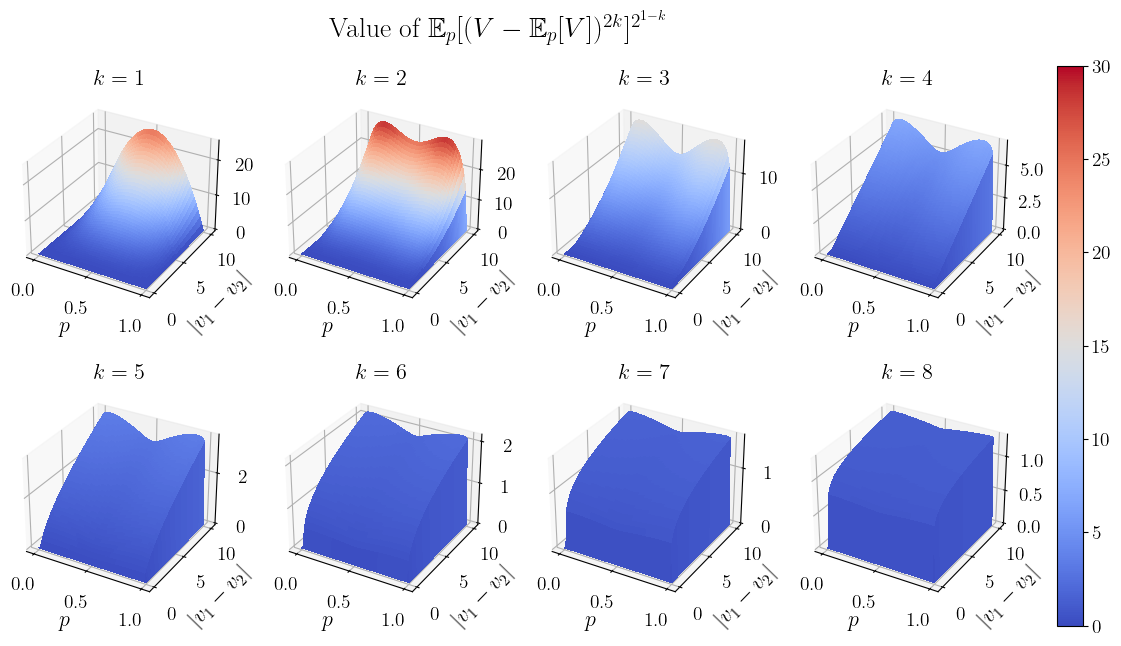

In [31]:
#
# Copyright (c) [2023] [NeurIPS authors, 11410]
# 
# This file is licensed under the MIT License.
# See the LICENSE file in the project root for full license information.
#

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

TITLE_SIZE = 20
LEGEND_SIZE = 20
TICK_SIZE = 14
AXIS_TITLE = TITLE_SIZE-4
AXIS_LABEL = TITLE_SIZE-4
FONT_SIZE = TITLE_SIZE-4

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath,amsfonts}}'
mpl.rcParams['font.family'] = "serif"


plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=AXIS_TITLE)     # fontsize of the axes title
plt.rc('axes', labelsize=AXIS_LABEL)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=TITLE_SIZE)  # fontsize of the figure title



p = np.linspace(0, 1, 50)
d = np.linspace(0, 10, 50)

P, D = np.meshgrid(p, d)

def compute_M(P, D, k):
    return ((D ** (2*k)) * P * (1 - P) * ((1-P) ** (2*k-1) + P ** (2*k - 1))) ** (2 ** (1. - k))


fig, ax = plt.subplots(2, 4, subplot_kw={"projection": "3d"}, figsize=(13,7))

surfs = []

vmax = 30
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)
for j in range(2):
    for i in range(1,5):
        Z = compute_M(P, D, j*4+i)
        surf = ax[j,i-1].plot_surface(P, D, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, norm=norm)
        surfs.append(surf)
        ax[j,i-1].set_xlabel('$p$')
        ax[j,i-1].set_ylabel('$|v_1-v_2|$')
        if np.max(Z) > vmax:
            vmax = np.max(Z)
        ax[j,i-1].set_title(f'$k={j*4+i}$')

cbar_ax = fig.add_axes([0.93, 0.1, 0.02, 0.8])

colorbar = cm.ScalarMappable(norm=norm, cmap=cm.coolwarm)
fig.colorbar(colorbar, cax=cbar_ax)
fig.suptitle(r'Value of $\mathbb{E}_p[(V - \mathbb{E}_p[V])^{2k}]^{2^{1-k}}$')
plt.savefig('figures/example_bernoulli.pdf')
plt.show()
